The State schema serves as the input schema for all Nodes and Edges in the Graph.

Let's use TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [3]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info: str

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with "state['graph_state']".

Each node returns a new value of the state key "graph_state".

By default, the new value returned by each node will override the prior state value.

In [5]:
def start_play(state: State):
    print("start_play node is called")

    return {"graph_info": state['graph_info'] + "I am planning to play and"}

In [6]:
def cricket_player(state: State):
    print("cricket_player node is called")

    return {"graph_info": state['graph_info'] + "I am a cricket player"}

In [7]:
def badminton_player(state: State):
    print("badminton_player node is called")
    return {"graph_info": state['graph_info'] + "I am a badminton player"}

In [18]:
import random
from typing import Literal # constant type
def random_choice(state: State) -> Literal["cricket_player", "badminton_player"]:
    graph_info = state['graph_info']
    if random.random() > 0.5:
        return "cricket_player"
    else:
        return "badminton_player"

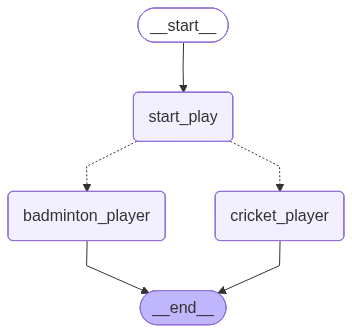

In [19]:
# Graph Construction
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("cricket_player", cricket_player)
graph.add_node("badminton_player", badminton_player)
#graph.add_node("random_choice", random_choice)

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_choice)
graph.add_edge("cricket_player", END)
graph.add_edge("badminton_player", END)

graph_builder = graph.compile()

Image(graph_builder.get_graph().draw_mermaid_png())
display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [20]:
##Graph Invocation

graph_builder.invoke({"graph_info": "Hey My name is Jeevan"})

start_play node is called
cricket_player node is called


{'graph_info': 'Hey My name is JeevanI am planning to play andI am a cricket player'}